In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---------------------------
## Question 1
------------------------------

In [45]:
class SimpleModel:
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
        
    def predict(self, x):
        return self.b1 * x + self.b0

In [46]:
class PolynomialModel:
    def __init__(self, b0=0, b1=0, b2=0):
        self.b0 = b0
        self.b1 = b1
        self.b2 = b2
        
    def predict(self, x):
        return self.b2 * x**2 + self.b1 * x + self.b0

In [3]:
df = pd.DataFrame({'temp': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
                  'yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]})
df

,temp,yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [4]:
df = pd.read_csv('temp_data.csv')
df

,temp,yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [11]:
x, y = df.temp.values, df['yield'].values

In [48]:
simple_formula = SimpleModel()

simple_formula.b1 = ( x.mean() * y.mean() - (x * y).mean() ) / ( x.mean() ** 2 - (x ** 2).mean() )

simple_formula.b0 = y.mean() - x.mean() * simple_formula.b1

print(f"b0: {simple_formula.b0}, b1: {simple_formula.b1}")

b0: 2.3063063063062987, b1: 0.0067567567567568525


In [49]:
simple_matrix = SimpleModel()

# X.b = Y
n = x.shape[-1]
X = np.array([n, x.sum(), x.sum(), (x * x).sum()]).reshape(2,2)

Y = np.array([y.sum(), (x * y).sum()]).reshape(2,1)

In [50]:
X_inv = np.linalg.inv(X)
b = np.matmul(X_inv, Y)
b

array([[2.30630631],
       [0.00675676]])

In [51]:
simple_matrix.b0, simple_matrix.b1 = tuple(b.flatten())

print(f"b0: {simple_matrix.b0}, b1: {simple_matrix.b1}")

b0: 2.306306306306297, b1: 0.00675675675675691


In [52]:
poly_matrix = PolynomialModel()

n = x.shape[-1]
X = np.array([n, x.sum(), (x**2).sum(),
              (x).sum(), (x**2).sum(), (x**3).sum(),
              (x**2).sum(), (x**3).sum(), (x**4).sum()]).reshape(3,3)
Y = np.array([y.sum(), (x * y).sum(), (x**2 * y).sum()]).reshape(3,1)

X, Y

(array([[       15,      1170,     95700],
        [     1170,     95700,   8127000],
        [    95700,   8127000, 710490000]]),
 array([[4.2500e+01],
        [3.3450e+03],
        [2.7681e+05]]))

In [95]:
def poly_regression(x, y, degree=2):
    mat = []
    for i in range(degree+1):
        row = []
        for j in range(degree+1):
            n = i + j
            row.append((x ** n).sum())
        mat.append(row)
    res = []
    for i in range(degree+1):
        res.append((y * x**i).sum())
    X, Y = np.array(mat).reshape(degree+1, degree+1), np.array(res).reshape(degree+1,1)
    B = np.matmul(np.linalg.inv(X), Y)
    return B.flatten()

def predict(x, b):
    degree = b.shape[-1] - 1
    y = np.zeros(x.shape)
    for i in range(degree+1):
        y += b[i] * x**i
    return y

In [87]:
poly_regression(x, y, 3)

array([ 2.10515723e+01, -7.14287212e-01,  8.76572327e-03, -3.40146751e-05])

In [53]:
X_inv = np.linalg.inv(X)
b = np.matmul(X_inv, Y)

poly_matrix.b0, poly_matrix.b1, poly_matrix.b2 = tuple(b.flatten())

print(f"b0: {poly_matrix.b0}, b1: {poly_matrix.b1}, b2: {poly_matrix.b2}")

b0: 7.960481099654089, b1: -0.15371134020614363, b2: 0.0010756013745701898


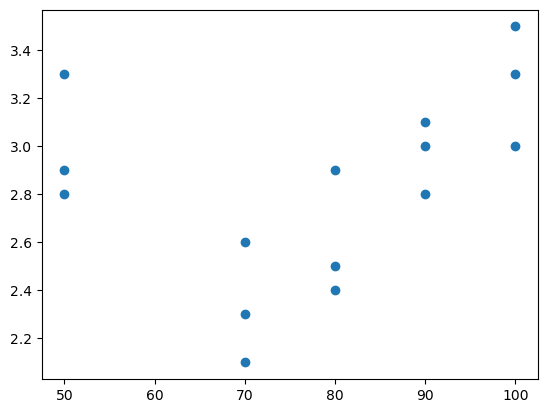

In [82]:
fig = plt.figure()
plt.scatter(x, y)
plt.show()

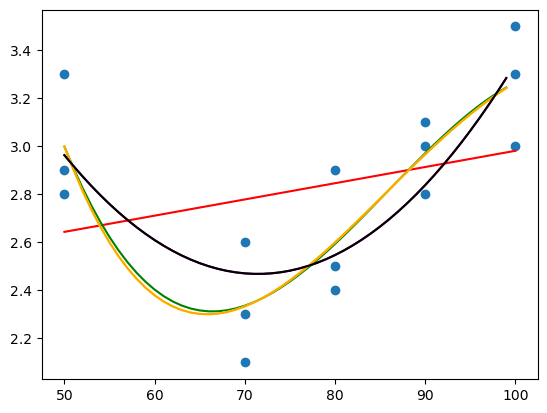

In [118]:
fig = plt.figure()
plt.scatter(x, y)
plt.plot(x, simple_formula.predict(x), color='red')
plot_x = np.array([i for i in range(50, 100)])
plt.plot(plot_x, poly_matrix.predict(plot_x), color='purple')

b = poly_regression(x, y, 3)
plt.plot(plot_x, b[0] + b[1] * plot_x + b[2] * plot_x ** 2 + b[3] * plot_x ** 3, color='green')

b = poly_regression(x, y, 4)
plt.plot(plot_x, b[0] + b[1] * plot_x + b[2] * plot_x ** 2 + b[3] * plot_x ** 3 + b[4] * plot_x ** 4, color='yellow')

b = poly_regression(x, y, 5)
plt.plot(plot_x, b[0] + b[1] * plot_x + b[2] * plot_x ** 2 + b[3] * plot_x ** 3 + b[4] * plot_x ** 4 + b[5] * plot_x ** 5, color='orange')

b = poly_regression(x, y, 7)
plt.plot(plot_x, predict(plot_x, b), color='black')

plt.show()

In [63]:
print("Simple Linear Regression")

y_pred = simple_matrix.predict(x)
error = y_pred - y
print("\nError:", error)

print("\nMSE:", (error ** 2).mean())

print("\nRMSE:", np.sqrt((error ** 2).mean()))

Simple Linear Regression

Error: [-0.65585586 -0.15585586 -0.25585586  0.47927928  0.17927928  0.67927928
  0.34684685 -0.05315315  0.44684685 -0.08558559 -0.18558559  0.11441441
 -0.31801802 -0.51801802 -0.01801802]

MSE: 0.1327087087087086

RMSE: 0.3642920651190588


In [64]:
print("Polynomial Linear Regression: Degree 2")

y_pred = poly_matrix.predict(x)
error = y_pred - y
print("\nError:", error)

print("\nMSE:", (error ** 2).mean())

print("\nRMSE:", np.sqrt((error ** 2).mean()))

Polynomial Linear Regression

Error: [-0.33608247  0.16391753  0.06391753  0.17113402 -0.12886598  0.37113402
  0.04742268 -0.35257732  0.14742268 -0.16116838 -0.26116838  0.03883162
  0.04536082 -0.15463918  0.34536082]

MSE: 0.04778465063001145

RMSE: 0.21859700508015076


In [98]:
print("Polynomial Linear Regression: Degree 3")

n = 3
b = poly_regression(x, y, n)

#y_pred = b[0] + b[1] * x + b[2] * x**2 + b[3] * x**3
y_pred = predict(x, b)

error = y_pred - y
print("\nError:", error)

print("\nMSE:", (error ** 2).mean())

print("\nRMSE:", np.sqrt((error ** 2).mean()))

Polynomial Linear Regression: Degree 3

Error: [-0.30031447  0.19968553  0.09968553  0.03647799 -0.26352201  0.23647799
  0.09371069 -0.30628931  0.19371069 -0.02861635 -0.12861635  0.17138365
 -0.03459119 -0.23459119  0.26540881]

MSE: 0.038681341719077576

RMSE: 0.19667572732566055


In [99]:
print("Polynomial Linear Regression: Degree 4")

n = 4
b = poly_regression(x, y, n)

#y_pred = b[0] + b[1] * x + b[2] * x**2 + b[3] * x**3 + b[4] * x**4
y_pred = predict(x, b)

error = y_pred - y
print("\nError:", error)

print("\nMSE:", (error ** 2).mean())

print("\nRMSE:", np.sqrt((error ** 2).mean()))

Polynomial Linear Regression: Degree 4

Error: [-0.30000004  0.19999996  0.09999996  0.0333333  -0.2666667   0.2333333
  0.09999998 -0.30000002  0.19999998 -0.03333334 -0.13333334  0.16666666
 -0.03333333 -0.23333333  0.26666667]

MSE: 0.03866666666666732

RMSE: 0.19663841605003668


In [123]:
print("Polynomial Linear Regression: Degree 5")

n = 5
b = poly_regression(x, y, n)

#y_pred = b[0] + b[1] * x + b[2] * x**2 + b[3] * x**3 + b[4] * x**4 + b[5] * x**5
y_pred = predict(x, b)

error = y_pred - y
print("\nError:", error)

print("\nMSE:", (error ** 2).mean())

print("\nRMSE:", np.sqrt((error ** 2).mean()))

Polynomial Linear Regression: Degree 5

Error: [-0.30000004  0.19999996  0.09999996  0.0333333  -0.2666667   0.2333333
  0.09999997 -0.30000003  0.19999997 -0.03333336 -0.13333336  0.16666664
 -0.03333335 -0.23333335  0.26666665]

MSE: 0.03866666666666766

RMSE: 0.19663841605003754


-----------------------
Question 2
--------------------------

In [66]:
df = pd.read_csv('rabbit_data.csv')
df

,infarc,area,group,x2,x3
0,0.1190,0.34,3,0,0
1,0.1900,0.64,3,0,0
2,0.3950,0.76,3,0,0
3,0.4690,0.83,3,0,0
4,0.1300,0.73,3,0,0
5,0.3110,0.82,3,0,0
6,0.4118,0.95,3,0,0
7,0.4800,1.06,3,0,0
8,0.6870,1.20,3,0,0
9,0.8470,1.47,3,0,0


In [155]:
class SimpleMultipleRegressionModel:
    def __init__(self, b=0):
        self.b = b
        
    def predict(self, x):
        bias_col = np.ones((x.shape[0], 1))
        x = np.concatenate((bias_col, x), axis=1)
        return x.dot(self.b)
    
def rmse(y, y_pred):
    y = y.flatten()
    y_pred = y_pred.flatten()
    error = y_pred - y
    mse = (error ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

In [156]:
x = df[['area', 'x2', 'x3']].values
y = df.infarc.values
x.shape, y.shape

((32, 3), (32,))

In [157]:
X = [[x.shape[0], x[:,0].sum(), x[:, 1].sum(), x[:, 2].sum()],
     [x[:, 0].sum(), (x[:, 0]**2).sum(), (x[:,0] * x[:, 1]).sum(), (x[:,0] * x[:, 2]).sum()],
     [x[:, 1].sum(), (x[:, 0] * x[:, 1]).sum(), (x[:, 1]**2).sum(), (x[:,1] * x[:, 2]).sum()],
     [x[:, 2].sum(), (x[:, 1] * x[:, 2]).sum(), (x[:, 1] * x[:, 2]).sum(), (x[:, 2]**2).sum()]]

In [158]:
X = np.array(X).reshape(4,4)
X

array([[32.    , 31.82  , 11.    , 11.    ],
       [31.82  , 33.5768, 11.    , 12.02  ],
       [11.    , 11.    , 11.    ,  0.    ],
       [11.    ,  0.    ,  0.    , 11.    ]])

In [159]:
Y = [y.sum(), (y * x[:, 0]).sum(), (y * x[:, 1]).sum(), (y * x[:, 2]).sum()]
Y = np.array(Y).reshape(4,1)
Y

array([[11.7828 ],
       [12.81667],
       [ 2.581  ],
       [ 5.162  ]])

In [160]:
b = np.matmul(np.linalg.inv(X), Y)
b

array([[-0.10486909],
       [ 0.24440398],
       [ 0.09510147],
       [ 0.57414181]])

In [163]:
multi_matrix = SimpleMultipleRegressionModel(b)

y_pred = multi_matrix.predict(x)

In [164]:
rmse(y, y_pred)

0.2751638492473441

In [165]:
y_pred, y

(array([[-0.02177173],
        [ 0.05154946],
        [ 0.08087794],
        [ 0.09798622],
        [ 0.07354582],
        [ 0.09554218],
        [ 0.12731469],
        [ 0.15419913],
        [ 0.18841569],
        [ 0.25440476],
        [ 0.09777013],
        [ 0.17842345],
        [ 0.21019597],
        [ 0.25174464],
        [ 0.2370804 ],
        [ 0.24196848],
        [ 0.273741  ],
        [ 0.2859612 ],
        [ 0.28351716],
        [ 0.28840524],
        [ 0.23219232],
        [ 0.65746379],
        [ 0.72589691],
        [ 0.72834095],
        [ 0.71856479],
        [ 0.71123267],
        [ 0.70634459],
        [ 0.74300519],
        [ 0.76988962],
        [ 0.76011346],
        [ 0.76744558],
        [ 0.8114383 ]]),
 array([0.119 , 0.19  , 0.395 , 0.469 , 0.13  , 0.311 , 0.4118, 0.48  ,
        0.687 , 0.847 , 0.062 , 0.122 , 0.033 , 0.102 , 0.206 , 0.249 ,
        0.22  , 0.299 , 0.35  , 0.35  , 0.588 , 0.379 , 0.149 , 0.316 ,
        0.39  , 0.429 , 0.477 , 0.439 , 0.446 

In [166]:
np.sqrt(((y_pred - y) ** 2).mean())

0.35167800281335215